In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_data_kaggle_df = pd.read_csv('../Cleaning/updated_covid_data_kaggle.csv')

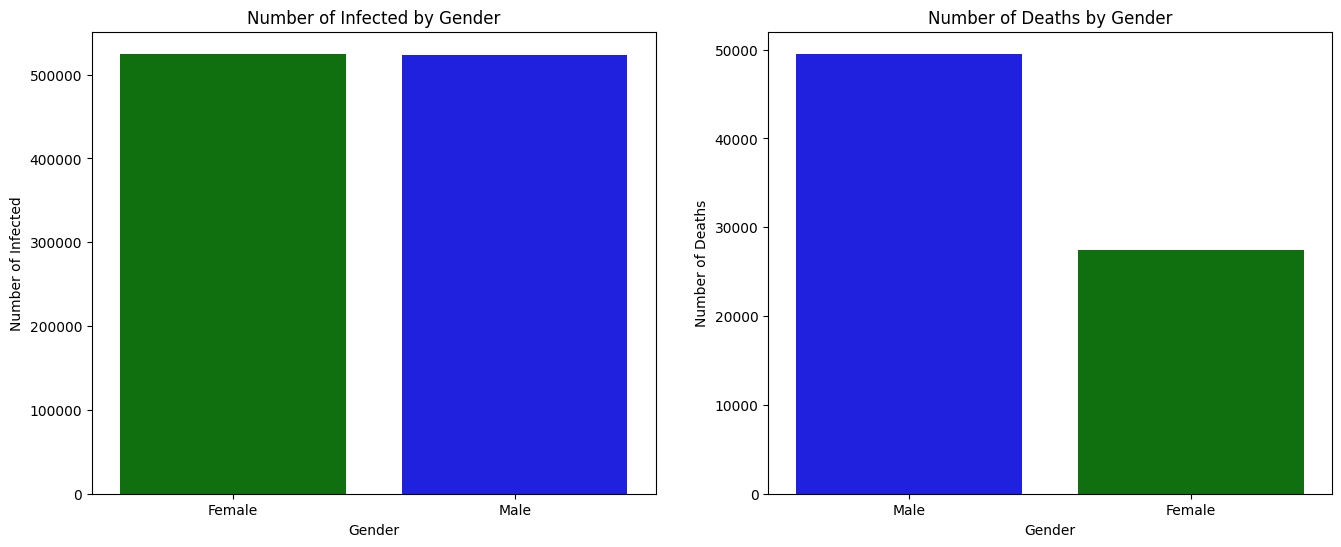

In [2]:
# Filter the DataFrame for rows where "Date_died" is not '-'
deaths_df = covid_data_kaggle_df[covid_data_kaggle_df['Date_died'] != '-']
death_counts = deaths_df['Sex'].value_counts()
infection_counts = covid_data_kaggle_df['Sex'].value_counts()
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for females and males
colors = {'Female': 'green', 'Male': 'blue'}

# Plot for number of infected males and females
sns.barplot(x=infection_counts.index, y=infection_counts.values, hue=infection_counts.index, palette=colors, ax=ax1)
ax1.set_title('Number of Infected by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Infected')

# Plot for number of deaths by gender
sns.barplot(x=death_counts.index, y=death_counts.values, hue=death_counts.index, palette=colors, ax=ax2)
ax2.set_title('Number of Deaths by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Deaths')

plt.show()

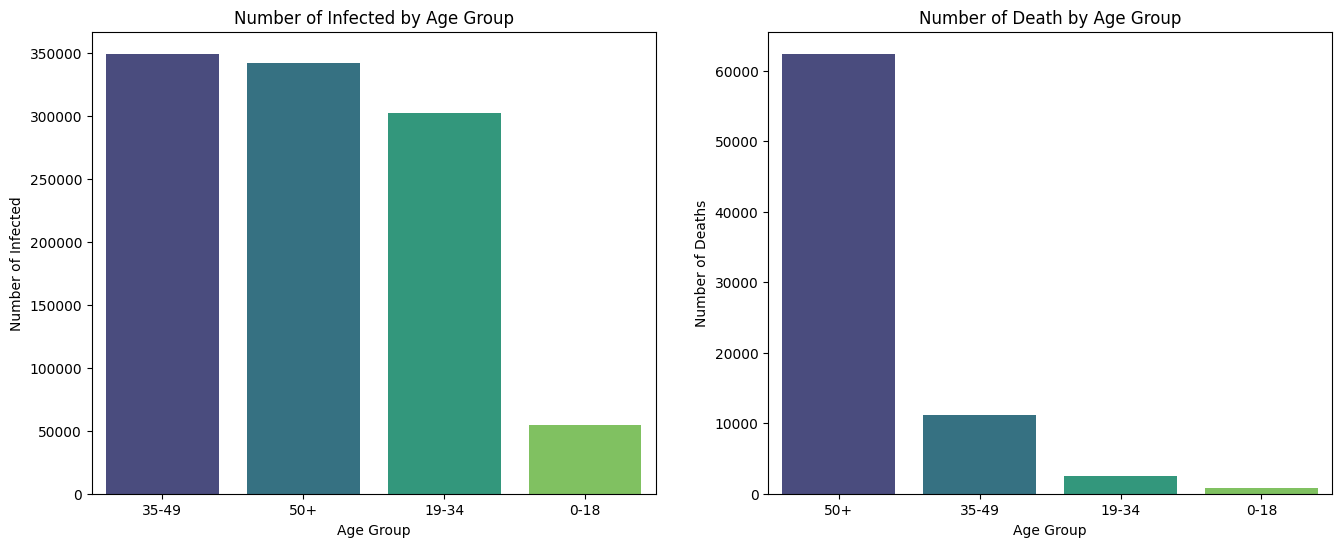

In [3]:
infection_counts_by_age_group = covid_data_kaggle_df['Age Group'].value_counts()
# Count the number of deaths per age group
death_counts_age_group = deaths_df['Age Group'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for number of infected males and females
sns.barplot(x=infection_counts_by_age_group.index, y=infection_counts_by_age_group.values, hue=infection_counts_by_age_group.index, palette='viridis', ax=ax1)
ax1.set_title('Number of Infected by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Infected')

# Plot for number of survivals by gender
sns.barplot(x=death_counts_age_group.index, y=death_counts_age_group.values, hue=death_counts_age_group.index, palette='viridis', ax=ax2)
ax2.set_title('Number of Death by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Number of Deaths')

plt.show()

Tobacco
No     69620
Yes     6592
-        725
Name: count, dtype: int64
7.8265618692565235
7.245207932888686


<Figure size 1000x600 with 0 Axes>

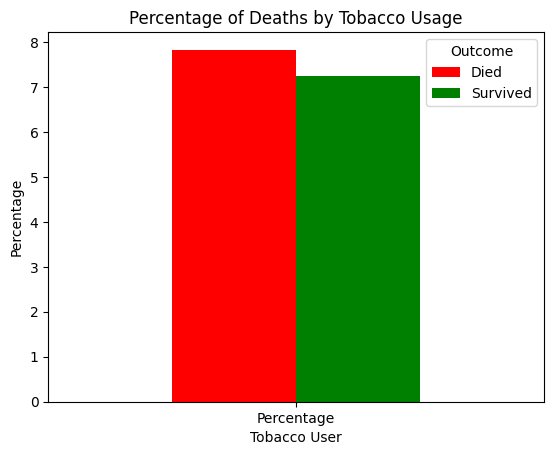

In [4]:
infection_counts_by_tobacco = covid_data_kaggle_df['Tobacco'].value_counts()
# Count the number of deaths among Tobacco users and non-Tobacco users
deaths_counts = deaths_df['Tobacco'].value_counts()
print(deaths_counts)
# Calculate the percentage of deaths among Tobacco users and non-Tobacco users
percentage_deaths_tobacco = (deaths_counts['Yes'] / infection_counts_by_tobacco['Yes']) * 100
percentage_survival_tobacco = (deaths_counts['No']/ infection_counts_by_tobacco['No']) * 100
print(percentage_deaths_tobacco)
print(percentage_survival_tobacco)

# Create a DataFrame for plotting with a proper index
plot_data = pd.DataFrame({
    'Tobacco User': percentage_deaths_tobacco,
    'Non-Tobacco User': percentage_survival_tobacco
}, index=['Percentage'])

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', color=['red', 'green'])
plt.title('Percentage of Deaths by Tobacco Usage')
plt.xlabel('Tobacco User')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.show()

C:\Users\arammos\AppData\Local\Temp\ipykernel_12316\1335585751.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')


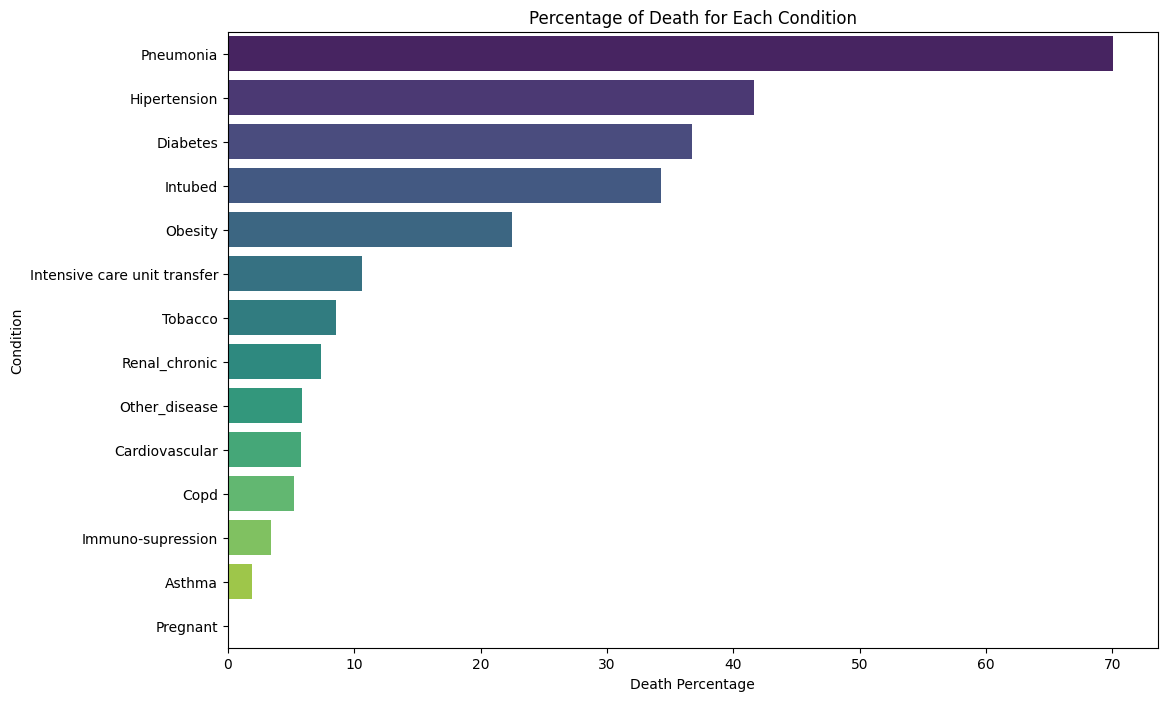

In [5]:
#Calculation of death percentage to detect the effect of each on incidence of death
total_deaths = covid_data_kaggle_df[covid_data_kaggle_df['Passed_away']=='Yes'].Passed_away.count()

percentage = []
columns=['Intubed', 'Pneumonia', 'Pregnant', 'Hipertension', 'Obesity', 'Cardiovascular', 'Renal_chronic', 'Tobacco', 'Other_disease', 'Copd', 'Diabetes', 'Asthma', 'Intensive care unit transfer', 'Immuno-supression']
for column in columns:
    percentage_per_column = covid_data_kaggle_df[(covid_data_kaggle_df['Passed_away']=='Yes') & (covid_data_kaggle_df[column]=='Yes')].Passed_away.count()/total_deaths * 100
    percentage.append(percentage_per_column)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Column': columns, 'Percentage': percentage})

# Sort the DataFrame by Percentage in descending order
plot_data = plot_data.sort_values(by='Percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')
plt.title('Percentage of Death for Each Condition')
plt.xlabel('Death Percentage')
plt.ylabel('Condition')
plt.show()